## Цель работы 

Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявления и описания зависимостей в исходных данных с использованием языка программирования.

## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Работа с данными 

  1. Получить \*.csv-файл с исходными данными согласно варианту. С помощью текстового редактора определить наличие заголовка и знак-разделитель столбца

  2. С помощью библиотеки pandas создать таблицу (объект Dataframe) на основе \*.csv-файла с исходными данными

  3. Провести первичный анализ всех данных. Получить размер исходный таблицы

  4. Определить наличие пропусков и выбрать способ их обработки. Получить размер таблицы после обработки пропусков 

  5. Определить наличие и привести нужные для работы признаки к числовому типу

  6. Сохранить в виде файла текущее состояние обработанной таблицы (Dataframe)


2. Выбор и обработка признаков

  1. Проверить взаимозависимость всех числовых признаков на основе матрицы корреляции

  2. Выбрать целевую переменную 'y' и независимые признаки 'x1, x2, x3, ...', оказывающие на нее влияние (целевая - 1 шт., признаки>=2 шт.) 

  3. Исключить выбросы

  4. Сформировать обучающую и проверочную части выборки


10. Построить линейные регрессионные модели для каждого выбранного признака :
  - m1: от единственного ЕДИНСТВЕННОЙ переменной (x1) на НЕ стандартизированных  данных
  - m2: от множества НАБОРА#1 переменных (пример: x1, x2, x3) на НЕ стандартизированных данных
  - m3: от множества НАБОРА#2 переменных (пример: x5, x6, x7) на НЕ стандартизированных данных

11. Выполнить анализ полученных моделей:

  1. Получить коэффициенты линейной регрессии y(x) = K*x + B

  2. Получить оценку точности R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение)

  3. Нанести график прямой y(x) = K*x + B поверх точечной диаграммы (выбранный признак, целевая переменная)
  
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  
  5. Построить гистограмму остатков (разностей между Y_pred и Y_test)
  
12. \* В качестве доп. задания предлагается расширить множество формируемых моделей.

## Содержание отчета
<font color='red'>Название отчета должно быть в формате:
<br>АВТ-8xx_ЛР-xx_Фамилия1_Фамилия2
</font>


1. Результаты первичного анализа исходных данных
  1. Количество записей и признаков
  2. Смысловое описание признаков
  3. Типы данных столбцов и информация о пропусках
  4. Результат замены категориальных или ранговых данных на числовые
  5. Результат обработки пропущенных значений

2. Обоснование выбора целевой переменной и признаков для анализа
  1. Перечень вариантов целевых переменных, исходя из п. 1.2.
  2. Матрица коэффициентов корреляции
  3. Матрица смежности (графический вариант интерпретации взаимосвязей переменных)
  4. Информация о целевом значении и признаках на него влияющих 
  5. Результат отчистки выбранных признаков исходного массива от выбросов

3. Результаты анализа полученных регрессионных линейных моделей (m11,m12,m21,m22)
  1. Уравнение линейной регрессии вида y(x_i, ...) =  K_i*x_i + ... + B 
  2. Оценка точности R2 и RMSE
  3. График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: выбранный признак, x: целевая переменная)
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  5. Гистограмму остатков (разностей между Y_pred и Y_test)
  

4. Выводы по результатам сравнительного анализа полученных регрессионных моделей 

# Работа с данными

## Подключение библиотек

Перед началом работы убедитесь, что необходимые для работы пакеты установлены в системе. Для установки отсутствующих используйте команду:
- pip install numpy pandas sklearn seaborn matplotlib
- pip install jupyterlab

Назначение библиотек:
* numpy - обработка многомерных массивов, линейная алгебра, преобразование Фурье, случайные числа
* pandas - обработка (загрузка, сохранение, анализа) данных 
* seaborn - визуализация данных (на базе matplotlib)
* sklearn - (классификация, регрессия, кластеризация...)
* scipy - пакет для выполнения научных и инженерных расчётов.

In [1]:
# Python 3.8
import pandas as pd
import numpy  as np

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

## Загрузка входных данных

Данные "bike-sharing-dataset_nan" содержат информацию о системе проката велосипедов в г. Порту (Португалия)
- мгновенно: индекс записи
- dteday : дата
- сезон : сезон (1:весна, 2:лето, 3:осень, 4:зима)
- yr : год (0: 2011, 1: 2012)
- mnth : месяц (от 1 до 12)
- час : час (от 0 до 23)
- выходной: праздничный день или нет (извлечено из http://dchr.dc.gov/page/holiday-schedule)
- рабочий день : день недели
- рабочий день: если день не является ни выходным, ни праздничным днем, равен 1, иначе равен 0.
+ погода:
- 1: ясно, небольшая облачность, переменная облачность, переменная облачность
- 2: Туман + Облачно, Туман + Разорванные облака, Туман + Немного облаков, Туман
- 3: Слабый снег, Слабый дождь + Гроза + Рассеянные облака, Слабый дождь + Рассеянные облака
- 4: Сильный дождь + Ледяные поддоны + Гроза + Туман, Снег + Туман
- temp : Нормализованная температура в градусах Цельсия. Значения делятся на 41 (макс.)
- atemp: Нормализованная температура ощущения в градусах Цельсия. Значения делятся на 50 (макс.)
- hum: Нормализованная влажность. Значения делятся на 100 (макс.)
- скорость ветра: нормализованная скорость ветра. Значения делятся на 67 (макс.)
- casual: количество случайных пользователей
- Registered: количество зарегистрированных пользователей
- cnt: общее количество арендованных велосипедов, включая обычные и зарегистрированные.

Для загрузки табличных данных из файла применятся функция .read_csv() с указанием параметров (путь, кодировка, разделитель, обработка колонок с заголовками или датой...)

<b> Путь вида "../datasets/melbourne_data.csv" подразумевает следующее расположение файлов:
```
WorkDir/
├─ datasets/
│  └─ melbourne_data.csv
│ 
├─ lab.1,2/
│  └─ 1,2. ЛР-1,2.ipynb
```
</b> 


In [2]:
df = pd.read_csv('../datasets/bike-sharing-dataset_nan.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                 
                   #  header= {None|Целочисленное} номер строки с заголовками, нумерация с нуля
                   header=0,       #если заголовки в нулевой строке таблицы
                   #  header=None  #если заголовки отсутствуют

                   # na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df[:2] # отобразить первые строки таблицы df 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0


Переменная __df__ является экземпляром класса __DataFrame__ библиотеки __pandas__.

"DataFrame" - двумерный массив с изменяемым размером  набором полезных функций, каждый столбец которого является экземпляром класса "Series".

| Series | Series | Series | Series |
|--------|--------|--------|--------|
| int | string | float | bool |
| int | string | float | bool |
| int | string | float | bool |

Смысловая интерпретация:
 - каждая строка - объект, прокат велосипедов
 - каждый столбец - признак, который описывает характеристику объекта

|   | Признак_0 | Признак_1 | Признак_2 |
|--------|--------|--------|--------|
| Объект_0 | string | float | bool |
| Объект_1 | string | float | bool |
| Объект_2 | string | float | bool |

Осмотрим полученную таблицу и убедимся, что данные загружены корректно

In [3]:
df [0:3] # Квадратные скобки позволяют получить срез исходной таблицы DataFrame[начало:конец]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0


## Осмотр данных / Первичный анализ

### Размер таблицы

Свойство __DataFrame.shape__ возвращает два значения соответствующей таблице - [кол-во строк, кол-во столбов]

In [4]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(17379, 17)
Итого: 17379 записи, 17 столбец (признак).


### Признаки

Метод __describe()__ выводит основные статистически  данных по каждому числовому признаку (типы int64 и float64): 
* count - число непропущенных значений, 
* mean - среднее арифметическое 
* std - стандартное отклонение (среднеквадратическое), 
* min, max - минимальное и максимальное значение 
* 0.25, 0.50, 0.75 квартили.
* unique - кол-во уникальных значения
* top - самое часто встречающееся значение
* freq - кол-во значений 'top'


In [5]:
df.describe() # описание для числовых значений

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17356.000000,17351.000000,17359.000000,17363.000000,17362.000000,17363.000000,17366.000000,17365.000000,17352.000000,17357.000000,17358.000000,17362.000000,17360.000000,17359.000000,17359.000000,17357.000000
mean,8686.832335,2.501239,0.502679,6.537868,11.547921,0.028797,3.003570,0.682753,1.425542,0.497088,0.475806,0.627195,0.190102,35.676998,153.730169,189.400645
std,5016.349071,1.107213,0.500007,3.439304,6.915699,0.167240,2.005833,0.465418,0.639497,0.192555,0.171834,0.192928,0.122334,49.313807,151.304605,181.377315
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4343.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8686.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13028.250000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Названия признаков

Получим список всех столбцов, при помощи свойства __DataFrame.columns__

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

В случае, если названия столбцов отсутствуют, либо требуется их изменить, то полю data.columns следует присвоить новый список(list) из строк.

In [7]:
colNamesList = ['instant',
                'dteday',
                'season',
                'yr',
                'mnth',
                'hr',
                'holiday',
                'weekday',
                'workingday',
                'weathersit',
                'temp',
                'atemp',
                'hum',
                'windspeed',
                'casual',
                'registered',
                'cnt',
               ]
df.columns = (  colNamesList )

## Пропущенные значения

Осмотрим значения последних пяти объектов, обратим внимание на значения __NaN__ в столбцах __'BuildingArea'__ и __'CouncilArea'__  - особые значение для заполнения отсутствующих в источнике.

In [8]:
df[-3:]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17376,17377.0,2012-12-31,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,17378.0,2012-12-31,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,17379.0,2012-12-31,1.0,1.0,12.0,23.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.65,0.1343,12.0,37.0,49.0


У объекта DataFrame присутствует функция isna(), которая формирует соответствующую __таблицу-маску__ совпадающую по размеру с исходной, но каждое значение __маски__ - логический индикатор True|False

In [9]:
df.isna()[-3:]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17378,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Над таблицей __таблицей-маской__ допустимо выполнить агрегирующую функцию __.sum()__ , при этом каждое значение TRUE будет приведено к единицы и в результате мы получим количество пропущенных элементов по каждому признаку. 

In [10]:
df.isna().sum() 

instant       23
dteday        18
season        28
yr            20
mnth          16
hr            17
holiday       16
weekday       13
workingday    14
weathersit    27
temp          22
atemp         21
hum           17
windspeed     19
casual        20
registered    20
cnt           22
dtype: int64

Для понимания как распределены отсутствующие значения в исходной таблице, попробуем получить графическое изображение __таблицы-маски__

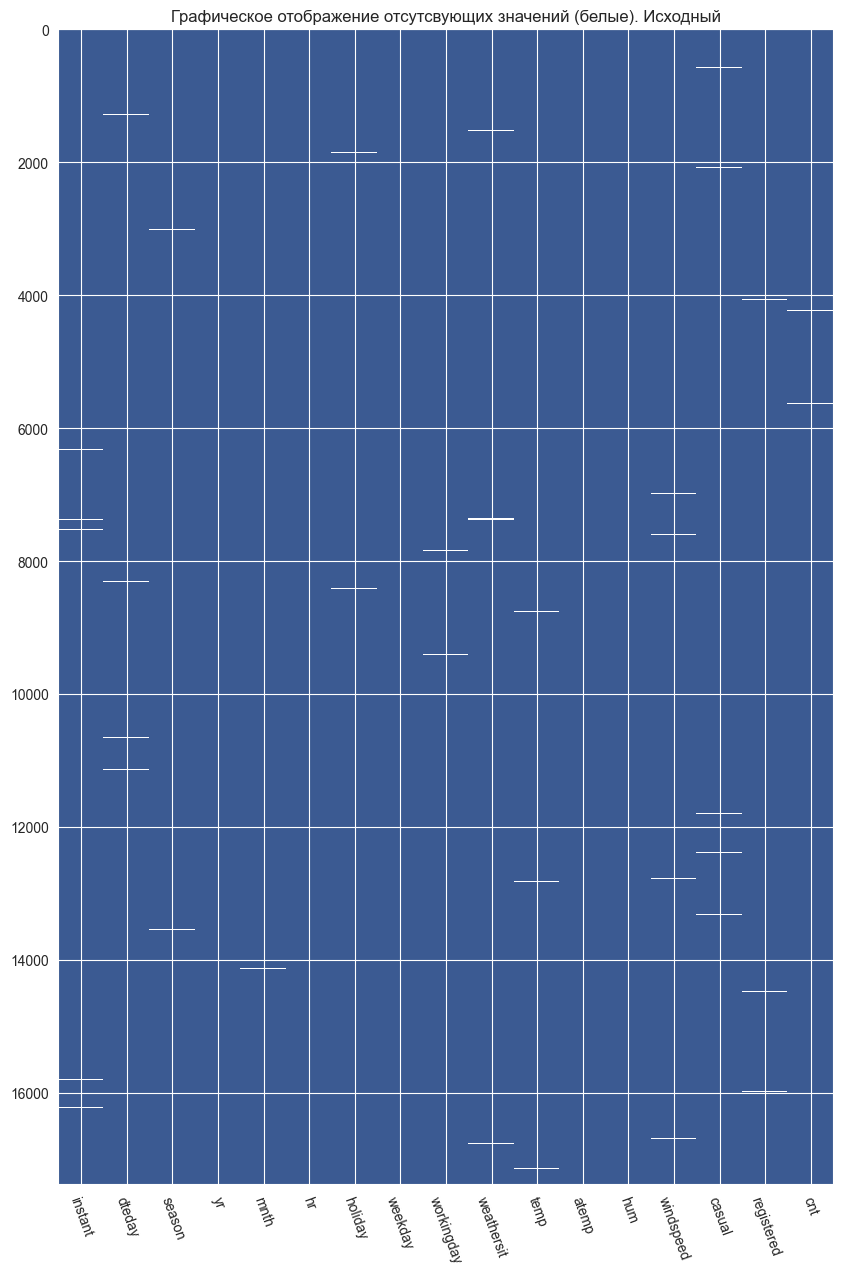

In [11]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7 
        
    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(dataF.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH))

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра 
    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), #cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
                interpolation= 'none',)
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)

# Вызов функции с указанием параметров
plotTableNA( df, "Исходный")

Перед дальнейшими действиями следует обработать пропущенные значения. Варианты обработки:
- Вар.1. заполнить "особыми" значениями, которые невозможно встретить в выборке (прим.: "#NA")
- Вар.2. заполнить вычисленными значениями, рассчитанными на основе имеющихся значений признака (средние, мин., макс., и т.д.)
- Вар.3. исключить строки или столбцы:
  - Вар.3.1. исключить строки, в которых присутствуют пропущенные значения
  - Вар.3.2. исключить столбцы, в которых присутствуют пропущенные значения 

In [12]:
print("Размер исходного DataFrame", df.shape)
print("Вар.3.1. Размер при исключении по строкам", df.dropna(axis='index', how='any').shape)
print("Вар.3.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (17379, 17)
Вар.3.1. Размер при исключении по строкам (17048, 17)
Вар.3.2. Размер при исключении по столбцам (17379, 0)


Несмотря на существенное кол-во пропущенных значений в признаках "BuildingArea" и "YearBuilt", названные признаки предположительно информативны, поэтому примем решение их сохранить, а следовательно выбрать режим исключения __"Вар.3.1."__ 

In [13]:
# axis='index' - удаление строк
# axis='columns' - удаление столбцов
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (17048, 17)


Необходимо убедится в том, ожидаемый результат совпадает с фактическим.

In [14]:
df.isna().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Приведение признаков к числовыми

На текущем этапе в таблице присутствуют столбцы с категориальными значениями (тип данных object), которые необходимо преобразовать к числовым значениям (тип данных int, float).

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17048 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17048 non-null  float64
 1   dteday      17048 non-null  object 
 2   season      17048 non-null  float64
 3   yr          17048 non-null  float64
 4   mnth        17048 non-null  float64
 5   hr          17048 non-null  float64
 6   holiday     17048 non-null  float64
 7   weekday     17048 non-null  float64
 8   workingday  17048 non-null  float64
 9   weathersit  17048 non-null  float64
 10  temp        17048 non-null  float64
 11  atemp       17048 non-null  float64
 12  hum         17048 non-null  float64
 13  windspeed   17048 non-null  float64
 14  casual      17048 non-null  float64
 15  registered  17048 non-null  float64
 16  cnt         17048 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


В нашем случае категориальными признаками является  символьные обозначения типа дата

Для преобразования числовым значениям только те признаки, количество уникальных значений не превышает 8 (строка unique).

In [16]:
df.describe(include=['object', 'bool'])  # описание для не числовых значений

,dteday
count,17048
unique,731
top,2011-01-01
freq,24


## Формирование таблицы с строго числовыми значениями

In [17]:
# список названий числовых признаков исходной таблицы
import pandas as pd
digitColName = [
                'season',
                'yr',
                'mnth',
                'hr',
                'holiday',
                'weekday',
                'workingday',
                'weathersit',
                'temp',
                'atemp',
                'hum',
                'windspeed',
                'casual',
                'registered',
                'cnt']
df_digPlus = pd.get_dummies(
    df[digitColName]
)
df_digPlus[:3]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0


# Выбор целевого значения и признаков для анализа данных

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlus </b></font>


## Корреляция

* __Коэффициент корреляции r-Пирсона__
  
  Мера линейной взаимосвязи переменных, при нелинейной взаимосвязи непоказателен. Не устойчив к выбросам в выборке. Учитывает числовые значения. Переменные должны иметь нормальное распределение. Изменяется в пределах от -1 до +1.

![Drag Racing](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Correlation_examples.png/400px-Correlation_examples.png)

In [18]:
corr_df = df_digPlus.corr(method='pearson')
corr_df["cnt"]

season        0.176654
yr            0.250279
mnth          0.119390
hr            0.392361
holiday      -0.030686
weekday       0.026464
workingday    0.030661
weathersit   -0.141246
temp          0.404217
atemp         0.400412
hum          -0.320820
windspeed     0.092522
casual        0.693769
registered    0.972102
cnt           1.000000
Name: cnt, dtype: float64

Для того, чтобы визуально оценить величину коэффициентов корреляции постоим тепловую карту по значениям взаимозависимости признаков выборки.

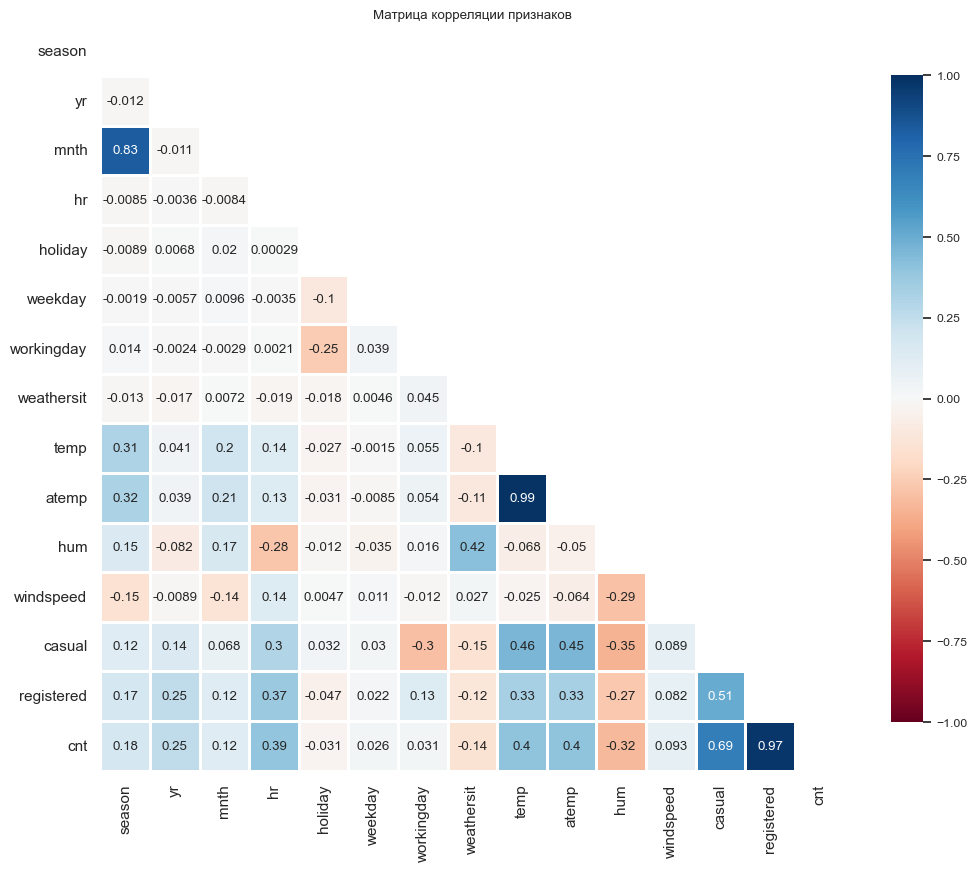

In [19]:
import matplotlib.pyplot as plt
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_df,   ### <<<- объект-матрица корреляции 
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');


In [20]:
# Последовательное применение операции: 
# - получить единственный столбец, 
# - получить абсолютные значения, 
# - отсортировать
corr_df[['cnt']].abs().sort_values(by="cnt")

,cnt
weekday,0.026464
workingday,0.030661
holiday,0.030686
windspeed,0.092522
mnth,0.119390
weathersit,0.141246
season,0.176654
yr,0.250279
hum,0.320820
hr,0.392361


В качестве целевой переменной выберем признак:
- **'cnt'** - количество арендованных велосипедов.


В качестве независимых переменных выберем признаки с высоким абс. значением коэфф. корреляции, но при этом как можно более не связанные  между собой. Кандидаты: 
  * **'registered'** - количество зарегистрированных пользователей
  * **'temp'** - температура в Цельсиях
  * **'season'** - сезон (1:весна, 2:лето, 3:осень, 4:зима)
  * **'hr'** - час (от 0 до 23)
  * **'hum'** - Нормализованная влажность. Значения делятся на 100 (макс.)
  
  

Составим список исходных и целевых переменных

In [21]:
features = ['temp',  'season', 'hr', 'hum']
target   = ['cnt']

# Просмотр характеристик выбранных признаков

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlus </b></font>


d:\2. programs\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

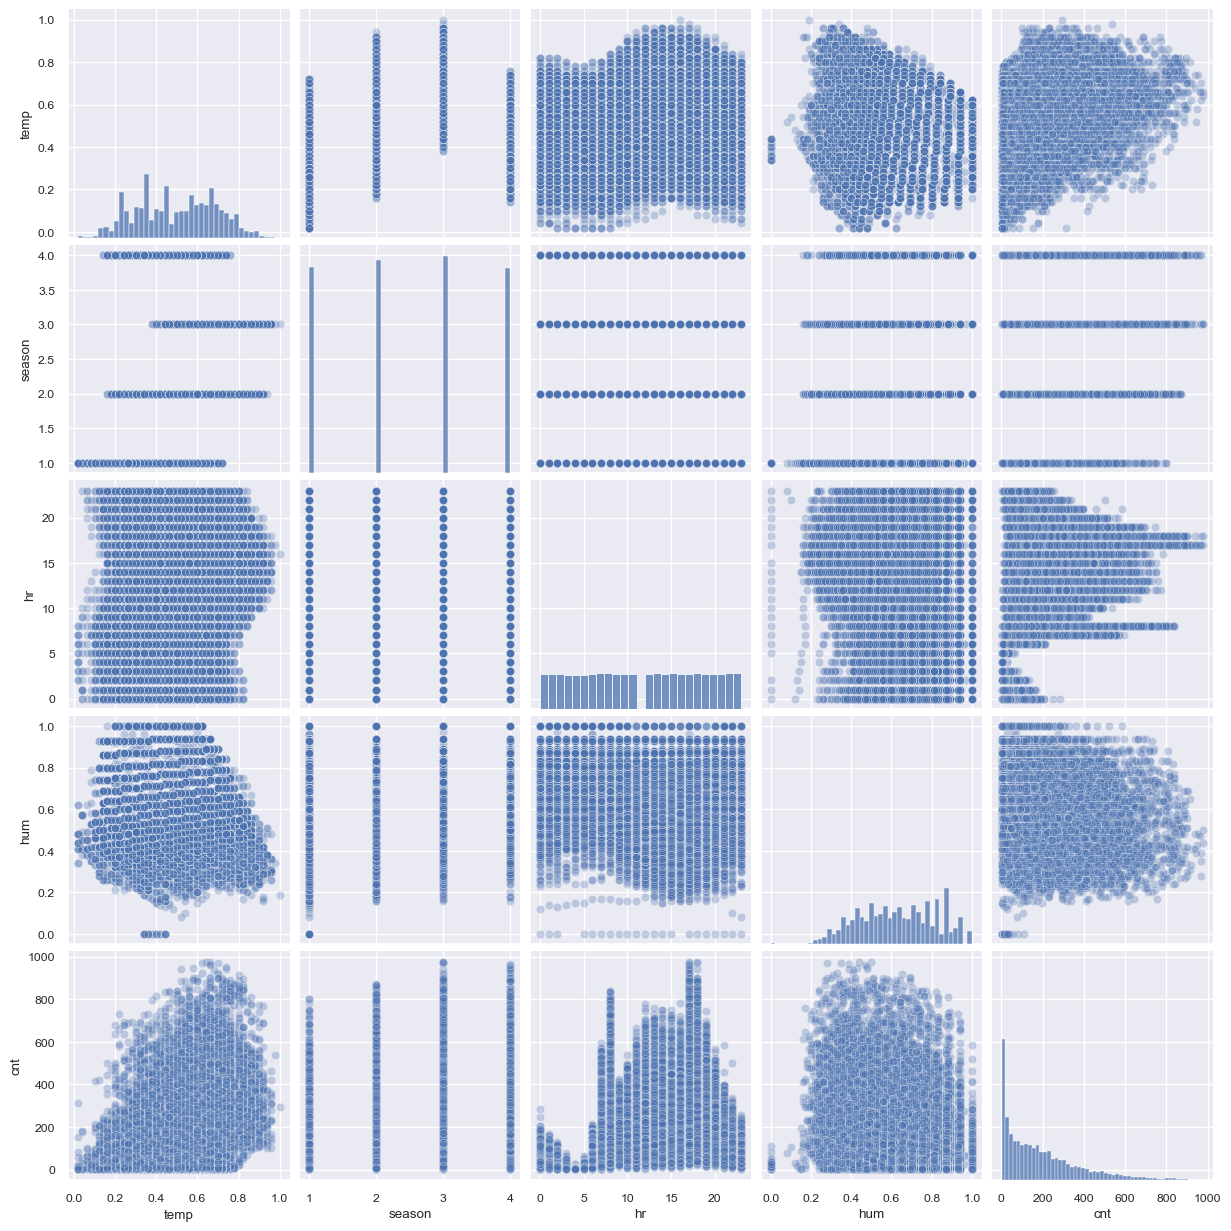

In [22]:
# График признаков попарно
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    df_digPlus[features + target], 
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter 
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
); 

## Поиск и обработка выбросов

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlus </b></font>


Судя по виду графиков рассеяния в "пустых областях" присутствуют малое кол-во объектов, т.е. в выборе присутствуют аномально малые или большие значения - "выбросы". Для их обработки проведем следующие операции.

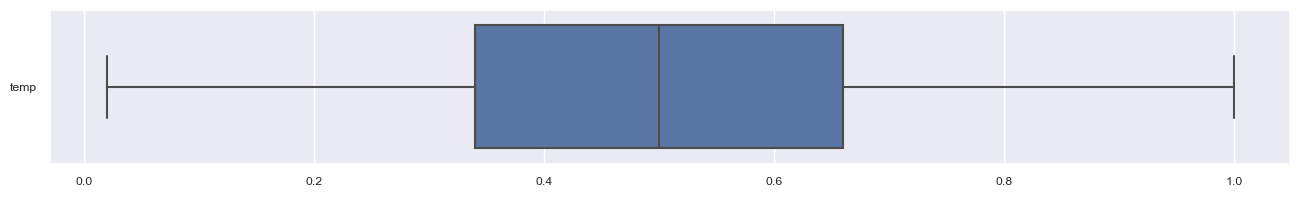

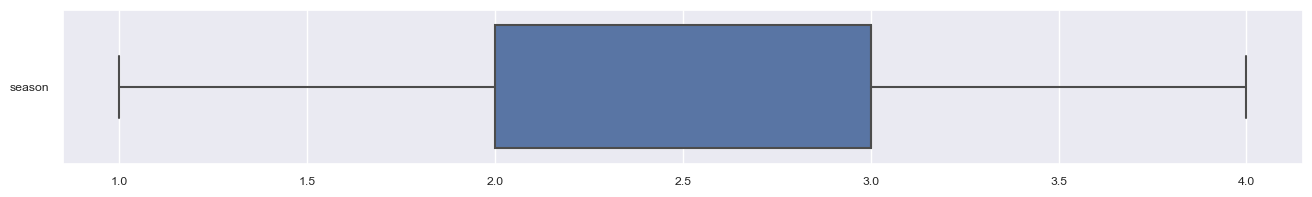

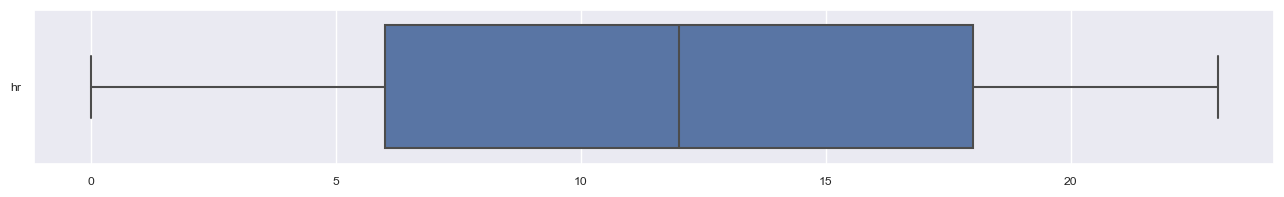

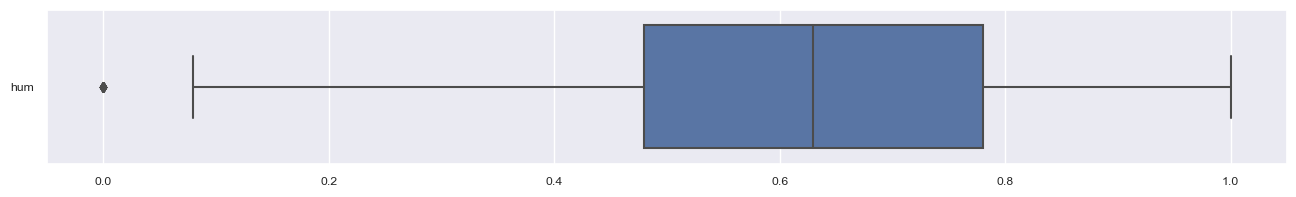

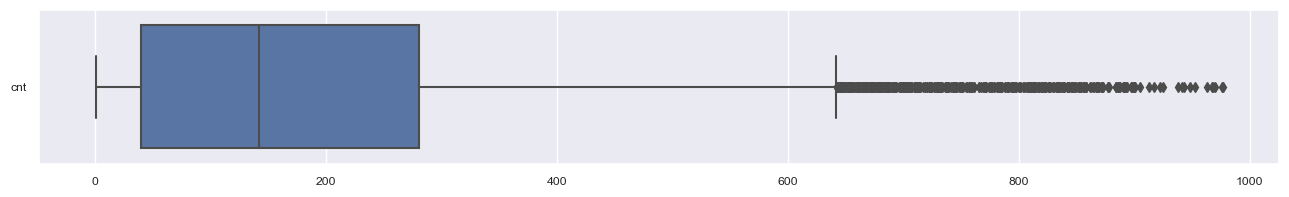

In [23]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):
    
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))
    
    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=df_digPlus[[feature_name]], # данные
                 orient='h' # ориентация графика
               )

Установим границы значений, для тех объектов таблицы, которые должны остаться

In [24]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = { 
    
    'temp' : (0, 1)     , # Нормализованная температура в градусах Цельсия.
    'season'  : (1, 4)        , # сезон (1:весна, 2:лето, 3:осень, 4:зима)
    'hr'     : (0,25) , # час (от 0 до 23)
    'hum'     : (0,1) , # Нормализованная влажность. Значения делятся на 100 (макс.)
    'cnt'     : (0,620) , # Нормализованная влажность. Значения делятся на 100 (макс.)
}

print (tressholdDict)

{'temp': (0, 1), 'season': (1, 4), 'hr': (0, 25), 'hum': (0, 1), 'cnt': (0, 620)}


Проверим, какая часть данных выходит за пределы границ значений


In [25]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df_digPlus[ 
                            ~(df_digPlus[feature_name] >= threesMin ) & (df_digPlus[feature_name] <= tresshMax) # фильтр по двум границам. ~ инверсия логических значений
                          ] 
                    )
    
    dcount = df_digPlus[feature_name].count() # кол-во эл. общее
    
    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format( 
        feature_name, 
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

temp. Принимаем пороговые значение равными (0, 1).
  Кол-во эл. вне пороговых - 0 из 17048 значение(ий) (0.0%)

season. Принимаем пороговые значение равными (1, 4).
  Кол-во эл. вне пороговых - 0 из 17048 значение(ий) (0.0%)

hr. Принимаем пороговые значение равными (0, 25).
  Кол-во эл. вне пороговых - 0 из 17048 значение(ий) (0.0%)

hum. Принимаем пороговые значение равными (0, 1).
  Кол-во эл. вне пороговых - 0 из 17048 значение(ий) (0.0%)

cnt. Принимаем пороговые значение равными (0, 620).
  Кол-во эл. вне пороговых - 0 из 17048 значение(ий) (0.0%)



Отфильтруем значения которые находятся вне пороговых.

In [26]:
# Во избежание путаницы создадим для полседующих операций копию исходного объетка
df_digPlusFiltred = df_digPlus.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]
    
    
    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_digPlusFiltred = df_digPlusFiltred[ 
        (df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax) 
        ]
    print("Обработан ", feature_name )
    
    
print ("Отброшено {} строк. Осталось {} строк.".format(
    len(df_digPlus)  - len(df_digPlusFiltred),
    len(df_digPlusFiltred))
)

Обработан  temp
Обработан  season
Обработан  hr
Обработан  hum
Обработан  cnt
Отброшено 572 строк. Осталось 16476 строк.


temp 0.02 1.0
season 1.0 4.0
hr 0.0 23.0
hum 0.0 1.0
cnt 1.0 620.0


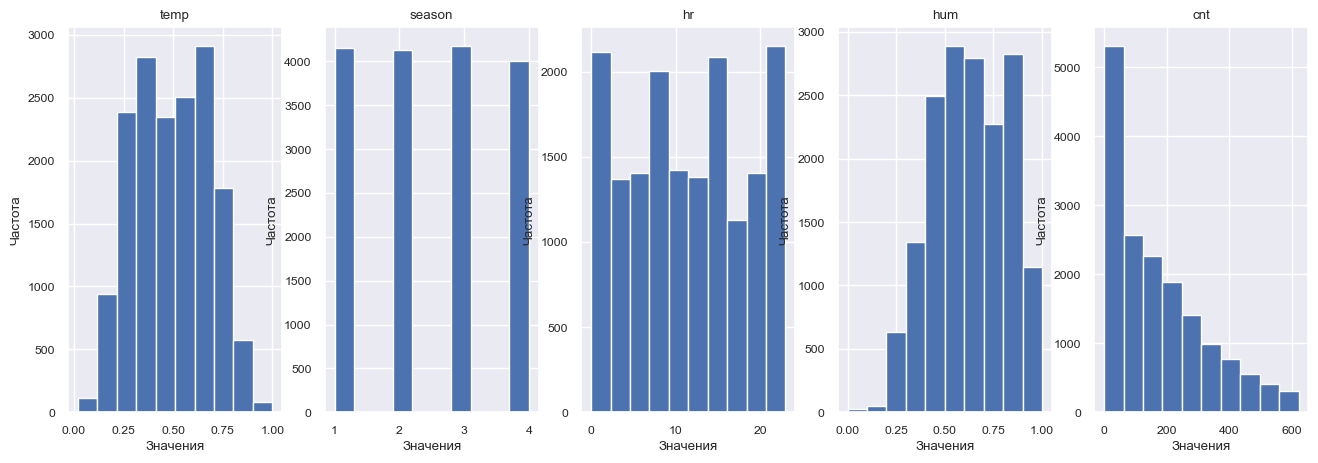

In [27]:
# Строим гистограммы по каждому признаку: 
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1
    
    plt.subplot(1, len(features+target), plot_number)
    
    plt.hist(df_digPlusFiltred[feature_name]) # Построение гистрограммы
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name, 
           df_digPlusFiltred[feature_name].min(),
           df_digPlusFiltred[feature_name].max())

## Сохранение данных

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlusFiltred </b></font>


In [28]:
df_digPlusFiltred.to_csv('./bike-sharing-dataset_nan_PREPARED.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

## Формирование тренировочной и проверочной выборок

<font color='red'> Все последующие действия производятся над таблицей <b>df_digPlusFiltred </b></font>


Для обучения и проверки качеста модели применяют прием заключающийся в разделении исходной выборки на части:
* Обучающую (Train) - данные, на которых модель формирует коэффициенты
* Проверочную (Test) - данные, которые предявляют обученой модели для получения и сравнения вычисленных(Predicted) значений. 

Для разделения воспользуемся функцией __train_test_split__ из пакета __sklearn__

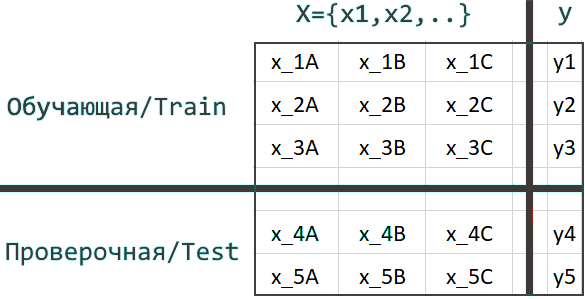

In [29]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_digPlusFiltred[features],    # исходные данные X
    df_digPlusFiltred[target],      # исходные данные y
    
    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
) 

In [30]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))

Кол-во элементов: 
  x_train: 11533, y_train 11533 
  x_test:  4943, y_test  4943 
  total x: 16476, total y 16476 


Проверим содержимое обучающей и проверочной частей

In [31]:
x_test[:3]

,temp,season,hr,hum
12199,0.76,2.0,12.0,0.62
958,0.30,1.0,13.0,0.39
17355,0.18,1.0,0.0,0.55


In [32]:
y_test[:3]

,cnt
12199,525.0
958,135.0
17355,34.0


# Построение модели

<font color='red'> Все последующие действия производятся над таблицами <b>x_train, x_test, y_train, y_test </b></font>


## Одномерная модель от признака 'Registered'

Для получения линейной регрессионной модели созданим экземпляр класс 
__sklearn.linear_model.LinearRegression()__

In [33]:
lr = linear_model.LinearRegression()

Полученная модель требует процедуры обучения - подбора значений коэфф. для минимизации отличий между вычисленными значениями и предоставленными целевыми (обучающими y). У большинства моделей доступен метод __.fit( x_train,y_train)__

In [34]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
lin_model_hr = lr.fit(
    x_train[['hr']], 
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_cnt_hr = lin_model_hr.predict(x_test[['hr']])

Для наглядности построим график рассеяния (он же график разброса, точечный, scatter)

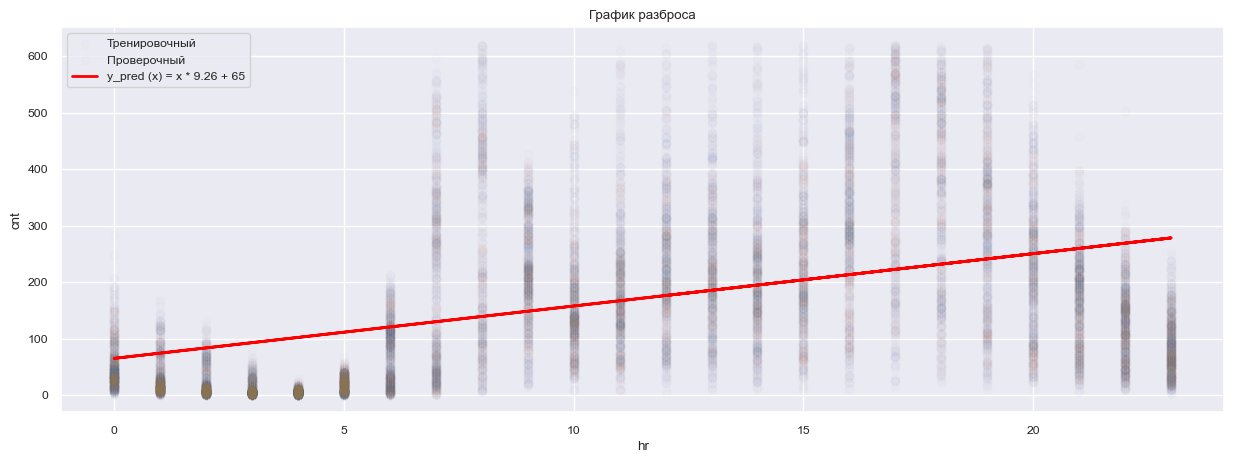

In [35]:
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(15,5))

# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['hr']],  y_train[['cnt']], alpha=0.01, label='Тренировочный') # тренировочный
plt.scatter(x_test[['hr']],   y_test[['cnt']],  alpha=0.01, label='Проверочный')   # проверочный

# Нанести график - линии через точки - plt.plot
label_str = "y_pred (x) = x * {:.2f} + {:.0f}".format(lin_model_hr.coef_[0][0], lin_model_hr.intercept_[0])

plt.plot( x_test[['hr']], y_pred_cnt_hr,
            lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('hr') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок

Т.к. модель является линейной имеются некоторые расхождения между реальными и вычисленными значениями - "ошибки". Для оценки точности построим гистограмму распределения ошибок

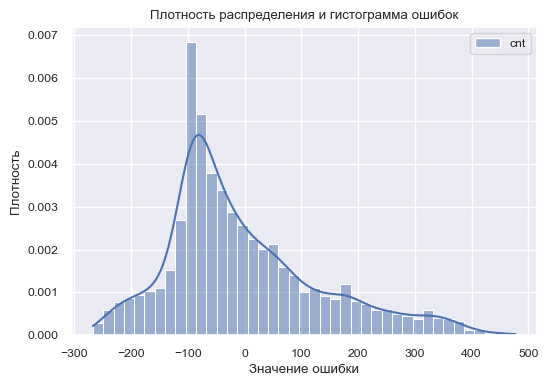

In [36]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
#sns.distplot(y_test[['Price']]- y_pred_PriceYearBuilt)
sns.histplot(y_test[['cnt']]- y_pred_cnt_hr, 
             color="red", 
             kde=True, # оценка плотности в виде кривой
             stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Построим еще пару графиков для визуальной оценки качества модели

Text(0, 0.5, 'Абсолютная ошибка')

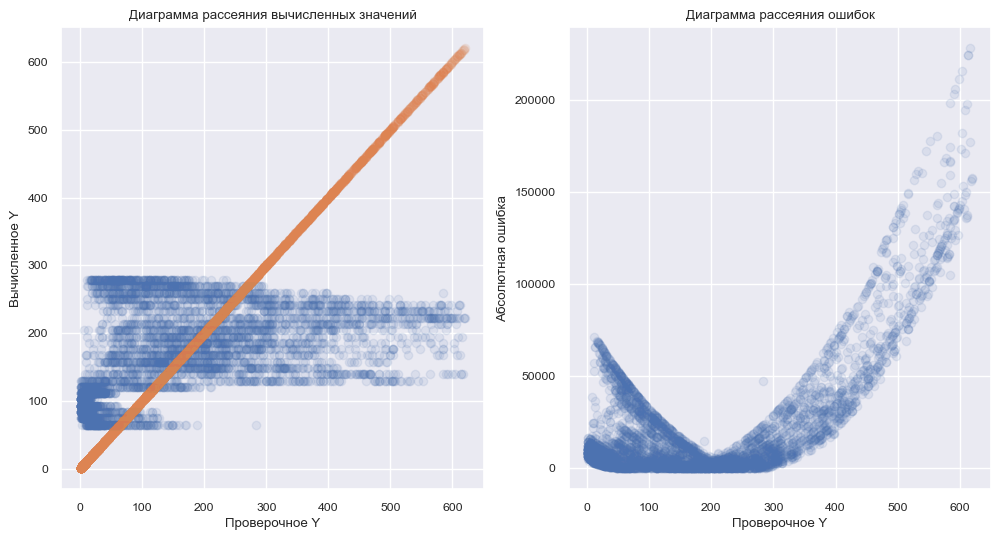

In [37]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_cnt_hr,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_cnt_hr)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')


С помощью функций __sklearn.metrics.*__ сравним реальные и вычисленные значениямя и получим важные оценки качества модели

In [38]:
print ("Линейная одномерная регрессия. Признак 'hr'.")
print ("y_pred_cnt_hr (x) = x * {} + {}\n".format(
    lin_model_hr.coef_, lin_model_hr.intercept_))

r2_LinRegr_hr   = metrics.r2_score                   (y_test[['cnt']], y_pred_cnt_hr)
mae_LinRegr_hr  = metrics.mean_absolute_error        (y_test[['cnt']], y_pred_cnt_hr)
rmse_LinRegr_hr = np.sqrt( metrics.mean_squared_error(y_test[['cnt']], y_pred_cnt_hr))


print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_LinRegr_hr ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_LinRegr_hr ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_LinRegr_hr ))

Линейная одномерная регрессия. Признак 'hr'.
y_pred_cnt_hr (x) = x * [[9.2609883]] + [65.34010457]

R2 - коэфф. детерминации:          0.178
MAE - средняя абсолютная ошибка: 107.847
RMSE - кв. корень из среднеквадратичной ошибки: 136.771


## Многомерная модель от  НАБОРА#1 переменных (пример: x1, x2, x3, ...) 

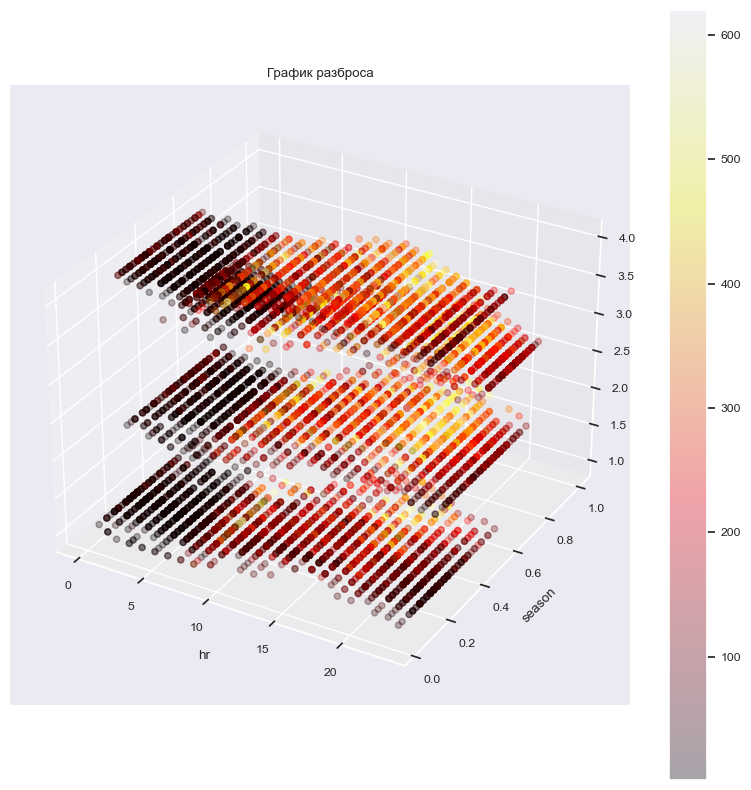

In [39]:
lr_x1x2x3 = linear_model.LinearRegression()

lin_model_x1x2x3 = lr_x1x2x3.fit(
    x_train[['hr', 'temp', 'season']], 
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_x1x2x3  = lin_model_x1x2x3.predict(x_test[['hr', 'temp', 'season']])

# Создать полотно для рисования с указаными размерами
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111, projection='3d')

x = x_train[['hr']]
y = x_train[['temp']]
z = x_train[['season']]
c = y_train[['cnt']]

img2 = ax2.scatter(x, y, z, c=c, cmap=plt.hot(), alpha=0.3)
fig2.colorbar(img2)

plt.xlabel('hr') # подпись осей
plt.ylabel("season")   # подпись осей
plt.title(u'График разброса'); # Заголовок

In [40]:
print ("Линейная многомерная регрессия. Признаки hr, temp, season.")
print ("y_pred_x1x2x3 (x) = x1 * {} +  x2 * {} +  x3 * {} + {}\n".format(
    lin_model_x1x2x3.coef_[0][0], lin_model_x1x2x3.coef_[0][1],  lin_model_x1x2x3.coef_[0][2], lin_model_x1x2x3.intercept_[0]))

r2_LinRegr_x1x2x3   = metrics.r2_score                   (y_test[['cnt']], y_pred_x1x2x3)
mae_LinRegr_x1x2x3  = metrics.mean_absolute_error        (y_test[['cnt']], y_pred_x1x2x3)
rmse_LinRegr_x1x2x3 = np.sqrt( metrics.mean_squared_error(y_test[['cnt']], y_pred_x1x2x3))


print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_LinRegr_x1x2x3 ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_LinRegr_x1x2x3 ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_LinRegr_x1x2x3 ))

Линейная многомерная регрессия. Признаки hr, temp, season.
y_pred_x1x2x3 (x) = x1 * 8.339617195562603 +  x2 * 265.14984932640147 +  x3 * 9.546138465015225 + -78.54715307173225

R2 - коэфф. детерминации:          0.304
MAE - средняя абсолютная ошибка:  97.461
RMSE - кв. корень из среднеквадратичной ошибки: 125.840


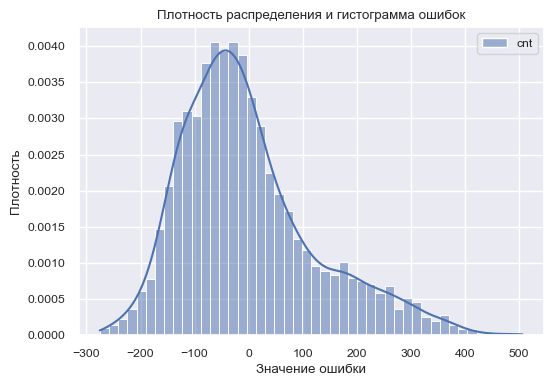

In [41]:
plt.figure(figsize=(6,4))

sns.histplot(y_test[['cnt']]- y_pred_x1x2x3, 
             color="red", 
             kde=True, # оценка плотности в виде кривой
             stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Text(0, 0.5, 'Абсолютная ошибка')

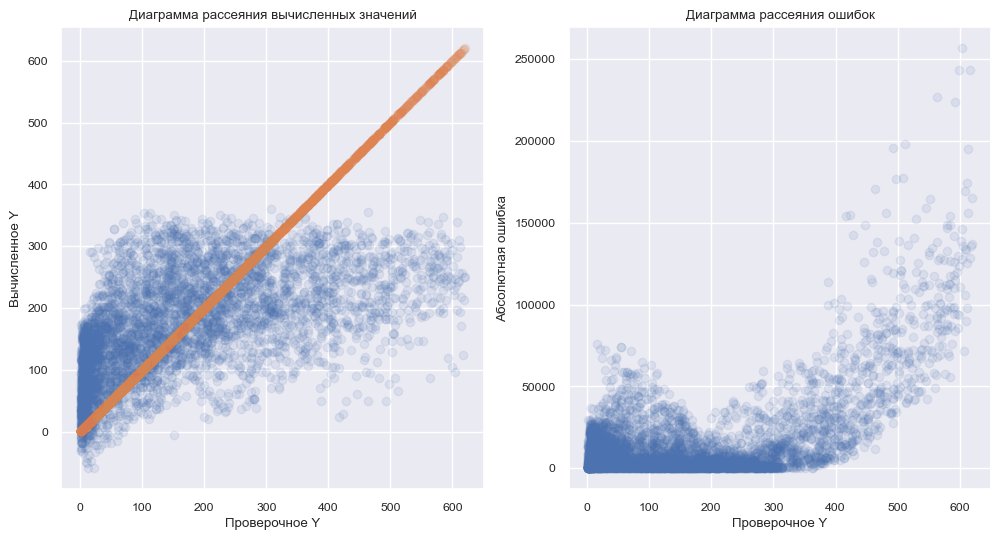

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_x1x2x3,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_x1x2x3)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

## Многомерная модель от  НАБОРА#2 переменных (пример: x5, x6, x7, ...) 

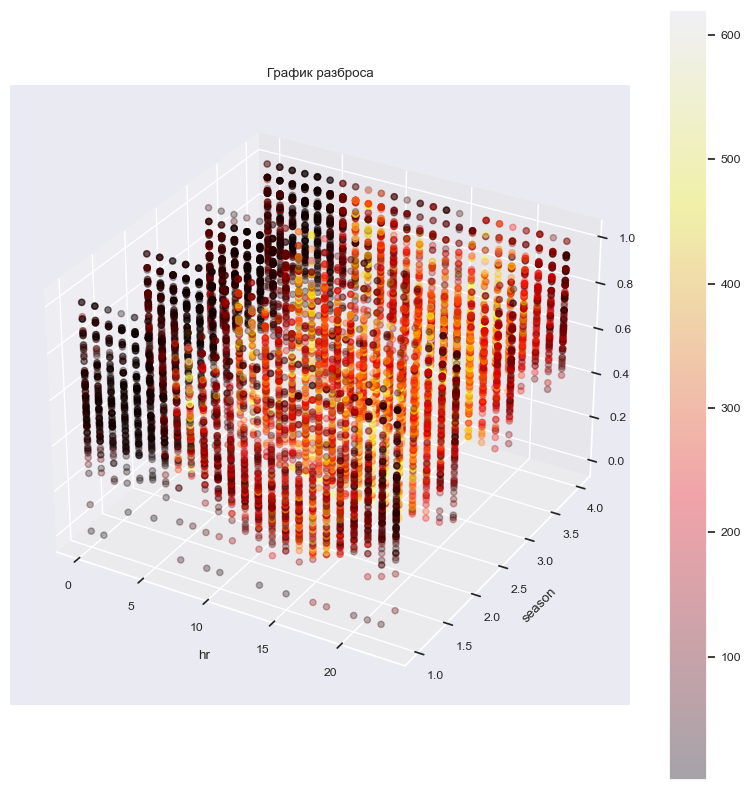

In [43]:
lr_x4x5x6 = linear_model.LinearRegression()

lin_model_x4x5x6 = lr_x4x5x6.fit(
    x_train[['hr', 'season', 'hum']], 
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_x4x5x6  = lin_model_x4x5x6.predict(x_test[['hr', 'season', 'hum']])

# Создать полотно для рисования с указаными размерами
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111, projection='3d')

x = x_train[['hr']]
y = x_train[['season']]
z = x_train[['hum']]
c = y_train[['cnt']]

img2 = ax2.scatter(x, y, z, c=c, cmap=plt.hot(), alpha=0.3)
fig2.colorbar(img2)

plt.xlabel('hr') # подпись осей
plt.ylabel("season")   # подпись осей
plt.title(u'График разброса'); # Заголовок

In [44]:
print ("Линейная многомерная регрессия. Признаки hr, season, hum.")
print ("y_pred_x4x5x6 (x) = x4 * {} +  x5 * {} +  x6 * {} + {}\n".format(
    lin_model_x4x5x6.coef_[0][0], lin_model_x4x5x6.coef_[0][1],  lin_model_x4x5x6.coef_[0][2], lin_model_x4x5x6.intercept_[0]))

r2_LinRegr_x4x5x6  = metrics.r2_score                   (y_test[['cnt']], y_pred_x4x5x6)
mae_LinRegr_x4x5x6 = metrics.mean_absolute_error        (y_test[['cnt']], y_pred_x4x5x6)
rmse_LinRegr_x4x5x6 = np.sqrt( metrics.mean_squared_error(y_test[['cnt']], y_pred_x4x5x6))


print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_LinRegr_x4x5x6 ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_LinRegr_x4x5x6 ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_LinRegr_x4x5x6 ))

Линейная многомерная регрессия. Признаки hr, season, hum.
y_pred_x4x5x6 (x) = x4 * 7.700379338653147 +  x5 * 29.41605797508325 +  x6 * -212.8225020037072 + 144.41619866403934

R2 - коэфф. детерминации:          0.271
MAE - средняя абсолютная ошибка:  99.842
RMSE - кв. корень из среднеквадратичной ошибки: 128.795


In [45]:
'hr', 'season', 'hum'

('hr', 'season', 'hum')

In [46]:
x_test[:1]

,temp,season,hr,hum
12199,0.76,2.0,12.0,0.62


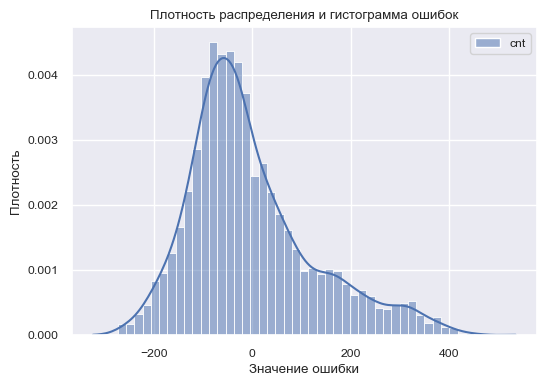

In [47]:
plt.figure(figsize=(6,4))

sns.histplot(y_test[['cnt']]- y_pred_x4x5x6, 
             color="red", 
             kde=True, # оценка плотности в виде кривой
             stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Text(0, 0.5, 'Абсолютная ошибка')

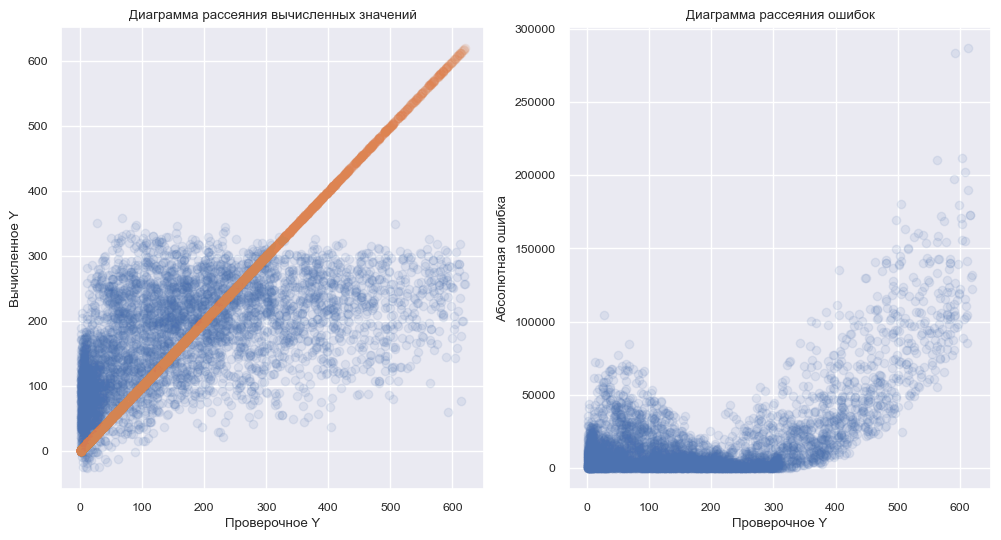

In [48]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_x4x5x6,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_x4x5x6)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

# Итоги. Сравнение полученных моделей

Размеры таблицы
- исходная таблица = Строк x Столбцов
- после искл пропущенных значений = Строк x Столбцов
- после искл выбросов = Строк x Столбцов


In [49]:
import pandas as pd

ddf = pd.DataFrame (
    {
        "Признак": ["hr", "x1, x2, x3", "x5, x6, x7"],
        "K":       [lin_model_hr.coef_[0][0], np.around(lin_model_x1x2x3.coef_[0],5), np.around(lin_model_x4x5x6.coef_[0], 5)], 
        "B":       [lin_model_hr.intercept_[0],     lin_model_x1x2x3.intercept_[0],     lin_model_x4x5x6.intercept_[0]],
        "MAE":     [mae_LinRegr_hr,     mae_LinRegr_x1x2x3,     mae_LinRegr_x4x5x6],
        "RMSE":    [rmse_LinRegr_hr,     rmse_LinRegr_x1x2x3,     rmse_LinRegr_x4x5x6],
        "R2":      [r2_LinRegr_hr,      r2_LinRegr_x1x2x3,     r2_LinRegr_x4x5x6],
    }
 )
ddf

,Признак,K,B,MAE,RMSE,R2
0,hr,9.260988,65.340105,107.846957,136.770593,0.177825
1,"x1, x2, x3","[8.33962, 265.14985, 9.54614]",-78.547153,97.461180,125.840167,0.303987
2,"x5, x6, x7","[7.70038, 29.41606, -212.8225]",144.416199,99.841808,128.794772,0.270920


# Выводы по работе

В ходе выполнения данной лабораторной работе был получен опыт работы первичного анализа “сырых данных”. Также проведен первичный анализ и осмотр данных. Из исходной таблицы были отброшены не устраивающие значения. Затем выбраны целевые и независимые переменные. Был проведен просмотр характеристик выбранных признаков. Реализовано сохранение форматированных данных. По некоторым признакам были получены и проанализированы регрессионные линейные модели....